## Visualization taken/modified from viz.py

In [1]:
import sys
sys.path.insert(0, '..')

from utils import data
import os
import sklearn
import numpy as np
import json
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

#### HYPERPARAMETERS

In [2]:
BASE_PATH = '../COVID-19/csse_covid_19_data/'
MIN_CASES = 1000

### 

In [3]:
confirmed = os.path.join(
    BASE_PATH, 
    'csse_covid_19_time_series',
    'time_series_covid19_confirmed_US.csv')
confirmed = data.load_csv_data(confirmed)
features = []
targets = []

## Plot cases by state (log)

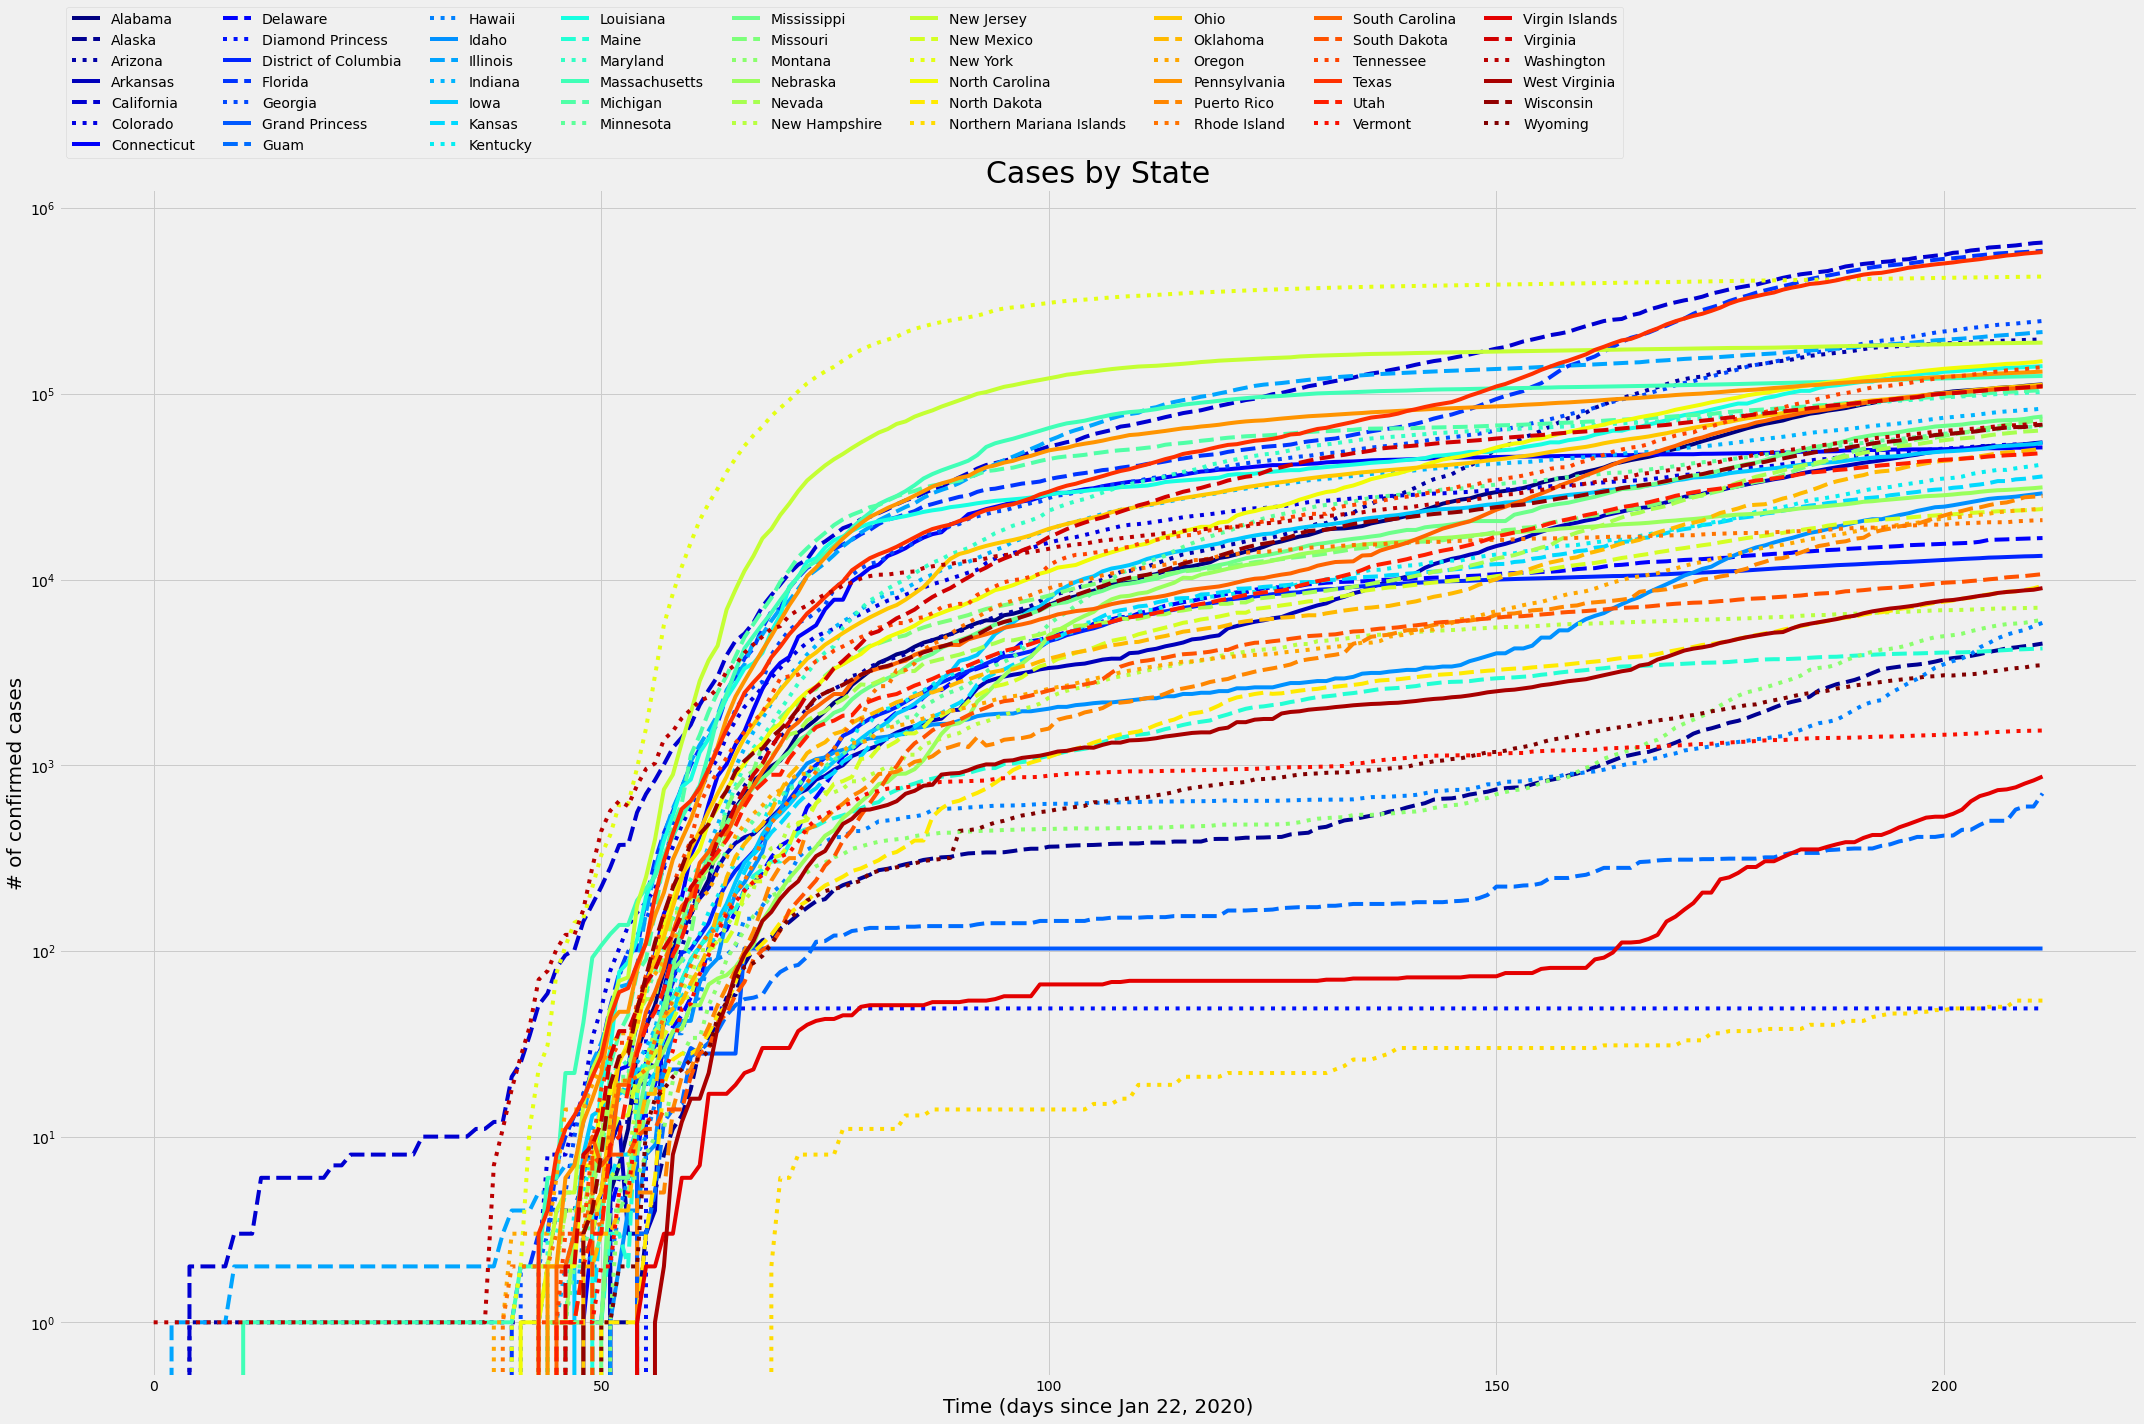

In [34]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
cm = plt.get_cmap('jet')
NUM_COLORS = 0
LINE_STYLES = ['solid', 'dashed', 'dotted']
NUM_STYLES = len(LINE_STYLES)

for val in np.unique(confirmed["Province_State"]):
    df = data.filter_by_attribute(
        confirmed, "Province_State", val)
    cases, labels = data.get_cases_chronologically(df)
    cases = cases.sum(axis=0)

    if cases.sum() > MIN_CASES:
        NUM_COLORS += 1
        
colors = [cm(i) for i in np.linspace(0, 1, NUM_COLORS)]
legend = []
handles = []

for val in np.unique(confirmed["Province_State"]):
    df = data.filter_by_attribute(
        confirmed, "Province_State", val)
    cases, labels = data.get_cases_chronologically(df)
    cases = cases.sum(axis=0)

    if cases.sum() > MIN_CASES:
        i = len(legend)
        lines = ax.plot(cases, label=labels[0,1])
        handles.append(lines[0])
        lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])
        lines[0].set_color(colors[i])
        legend.append(labels[0, 6])
        
ax.set_title('Cases by State', fontsize=30)
ax.set_ylabel('# of confirmed cases', fontsize=20)
ax.set_xlabel("Time (days since Jan 22, 2020)", fontsize=20)

ax.set_yscale('log')
ax.legend(handles, legend, bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=9)
plt.tight_layout()

## Plot cases by state (linear)

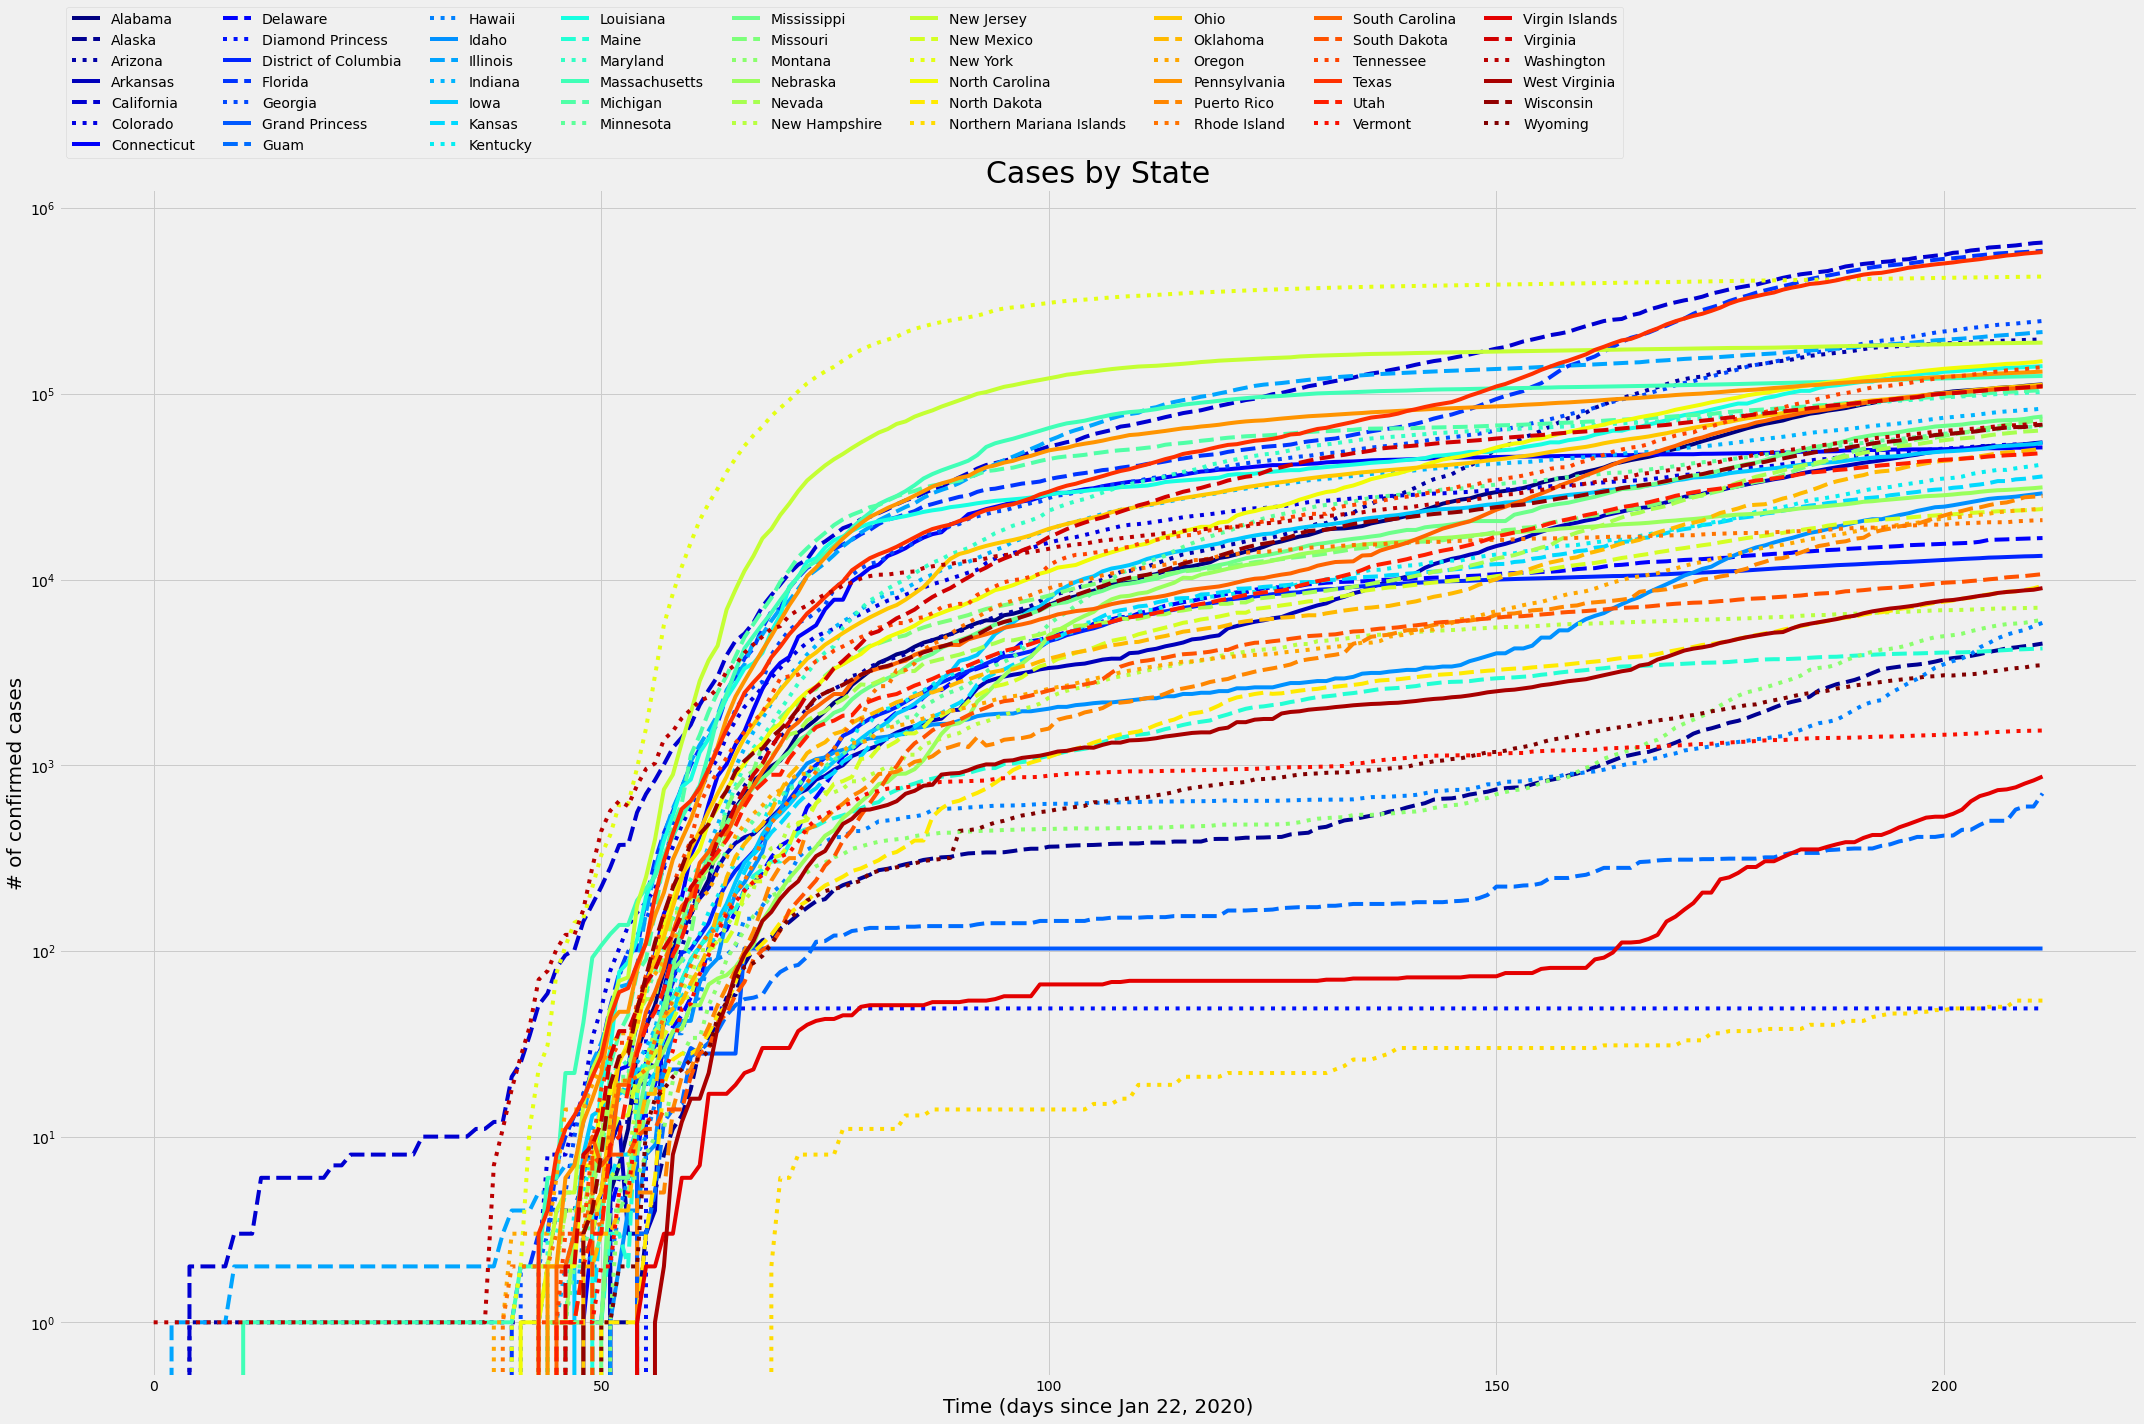

In [87]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
cm = plt.get_cmap('jet')
NUM_COLORS = 0
LINE_STYLES = ['solid', 'dashed', 'dotted']
NUM_STYLES = len(LINE_STYLES)

for val in np.unique(confirmed["Province_State"]):
    df = data.filter_by_attribute(
        confirmed, "Province_State", val)
    cases, labels = data.get_cases_chronologically(df)
    cases = cases.sum(axis=0)

    if cases.sum() > MIN_CASES:
        NUM_COLORS += 1
        
colors = [cm(i) for i in np.linspace(0, 1, NUM_COLORS)]
legend = []
handles = []

for val in np.unique(confirmed["Province_State"]):
    df = data.filter_by_attribute(
        confirmed, "Province_State", val)
    cases, labels = data.get_cases_chronologically(df)
    cases = cases.sum(axis=0)

    if cases.sum() > MIN_CASES:
        i = len(legend)
        lines = ax.plot(cases, label=labels[0,1])
        handles.append(lines[0])
        lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])
        lines[0].set_color(colors[i])
        legend.append(labels[0, 6])
        
ax.set_ylabel('# of confirmed cases', fontsize=20)
ax.set_xlabel("Time (days since Jan 22, 2020)", fontsize=20)
ax.set_title('Cases by State', fontsize=30)

ax.set_yscale('log')
ax.legend(handles, legend, bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=9)
plt.tight_layout()

## Plot cases for MA and IL

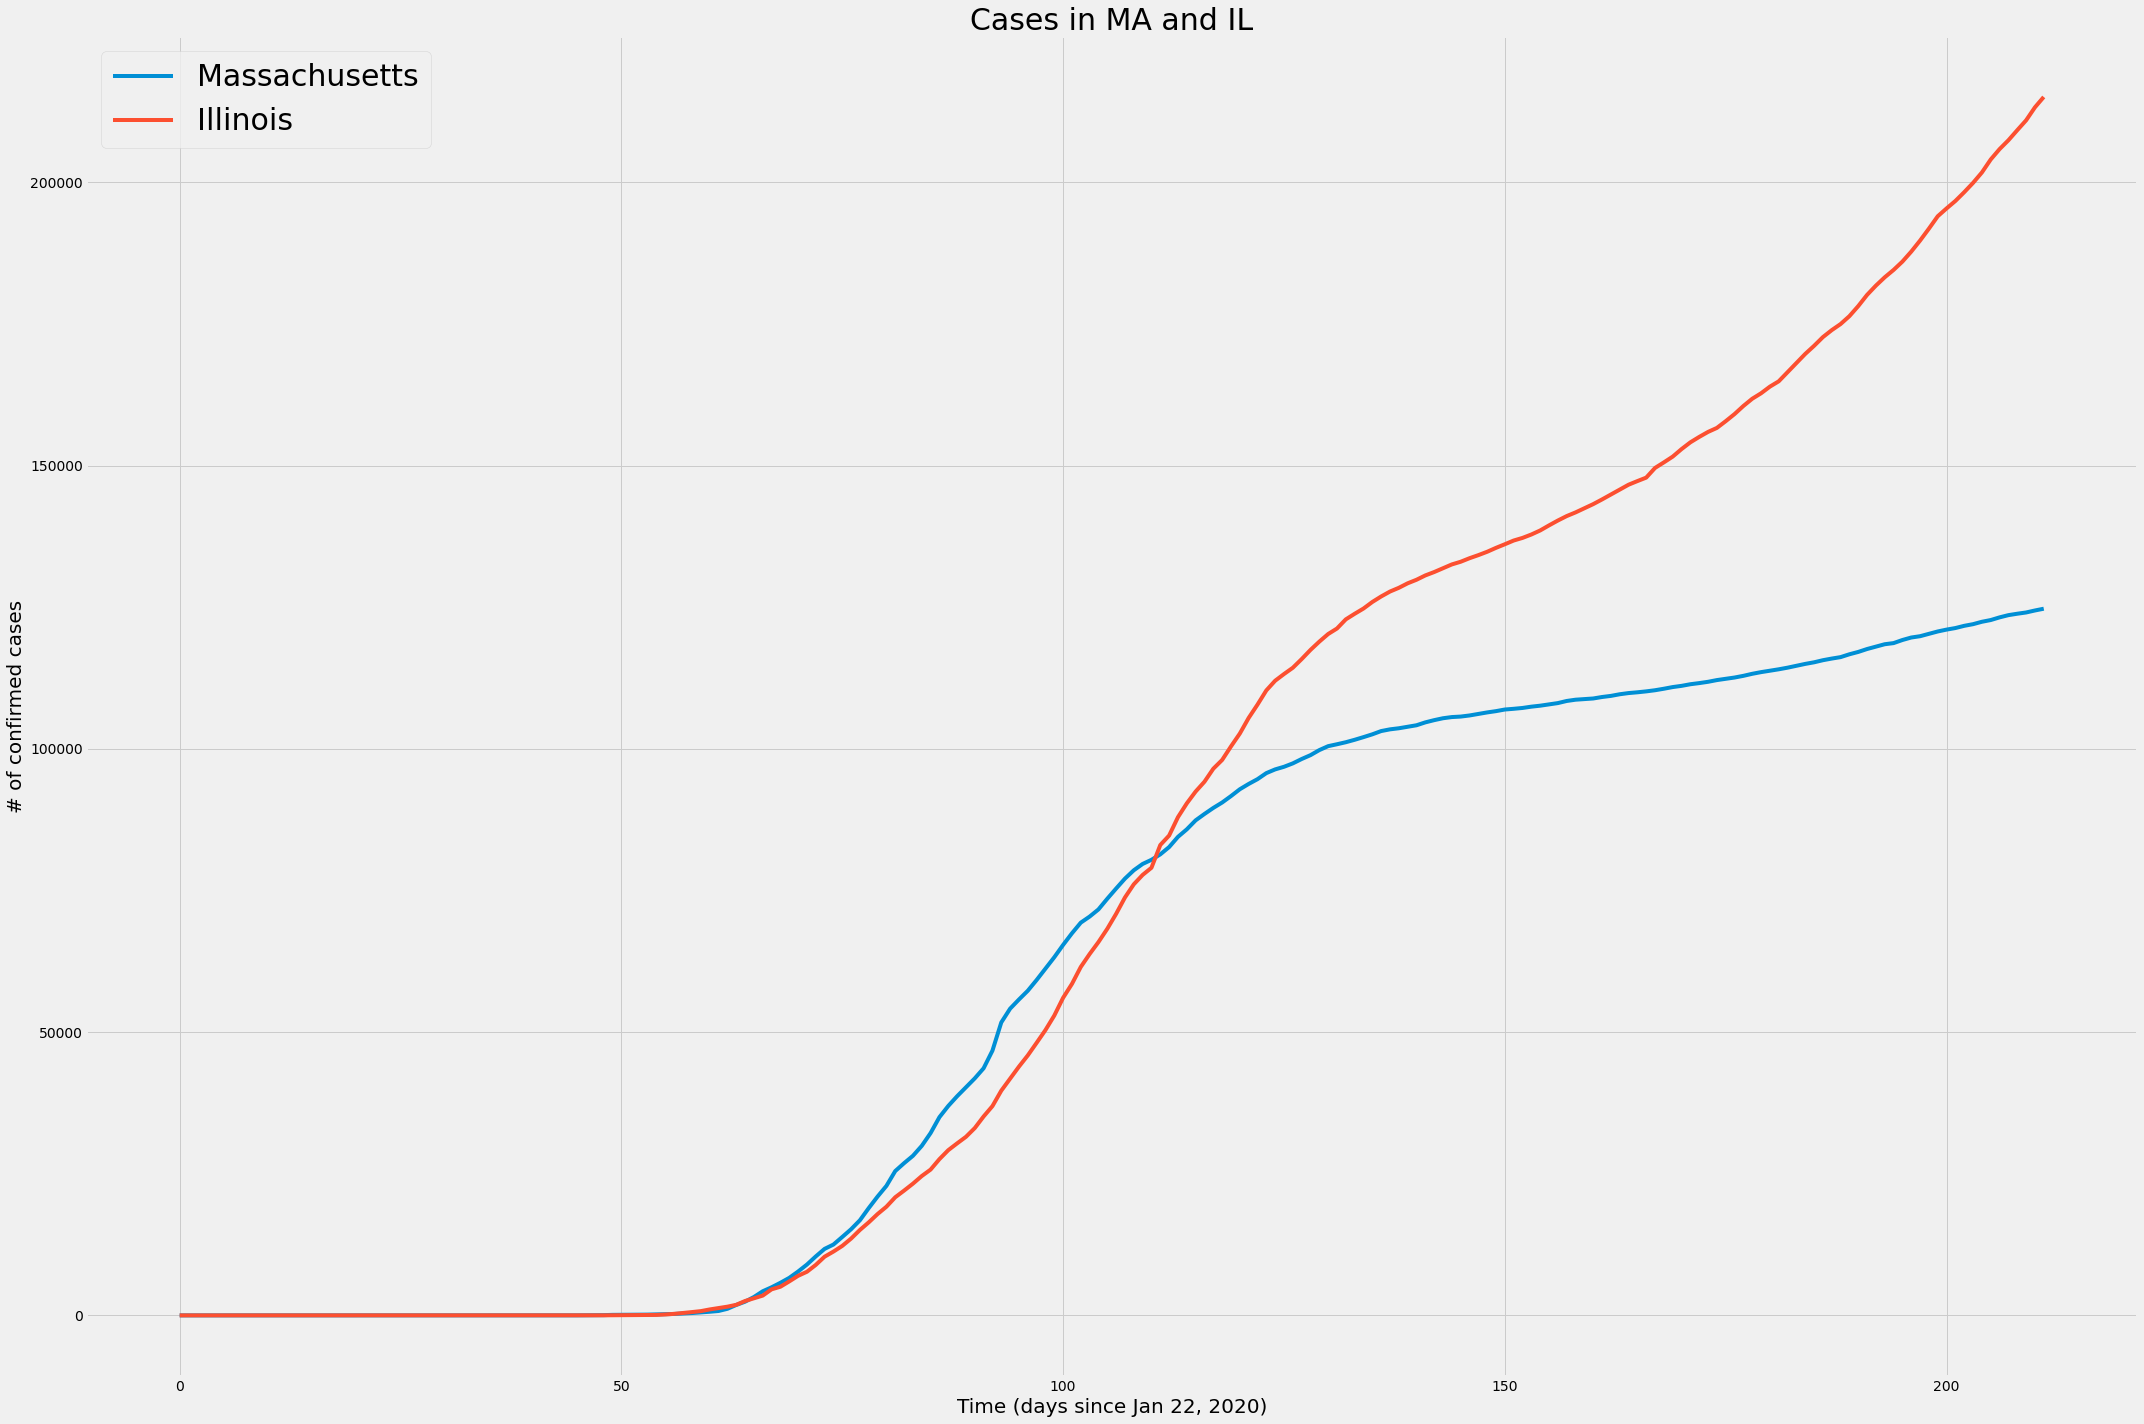

In [33]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
cm = plt.get_cmap('jet')
NUM_COLORS = 0
LINE_STYLES = ['solid', 'dashed', 'dotted']
NUM_STYLES = len(LINE_STYLES)


#for val in np.unique(confirmed["Province_State"]):
#    df = data.filter_by_attribute(
#        confirmed, "Province_State", val)
#    cases, labels = data.get_cases_chronologically(df)
#    cases = cases.sum(axis=0)

#    if cases.sum() > MIN_CASES:
#        NUM_COLORS += 1
        
#colors = [cm(i) for i in np.linspace(0, 1, NUM_COLORS)]
#legend = []
#handles = []

mass_df = data.filter_by_attribute(
    confirmed, "Province_State", "Massachusetts")
mass_cases, labels = data.get_cases_chronologically(mass_df)
mass_cases = mass_cases.sum(axis=0)

il_df = data.filter_by_attribute(
    confirmed, "Province_State", "Illinois")
il_cases, labels = data.get_cases_chronologically(il_df)
il_cases = il_cases.sum(axis=0)

ax.plot(mass_cases, label='Massachusetts')
ax.plot(il_cases, label='Illinois')
ax.legend(['Massachusetts', 'Illinois'], loc=2, fontsize=30)

#    if cases.sum() > MIN_CASES:
#        i = len(legend)
#        lines = ax.plot(cases, label=labels[0,1])
#        handles.append(lines[0])
#        lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])
#        lines[0].set_color(colors[i])
#        legend.append(labels[0, 6])
        
ax.set_ylabel('# of confirmed cases', fontsize=20)
ax.set_xlabel("Time (days since Jan 22, 2020)", fontsize=20)
ax.set_title('Cases in MA and IL', fontsize=30)

ax.set_yscale('linear')
#ax.legend(handles, legend, bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=9)
plt.tight_layout()

## Daily New Cases in MA and IL

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 16, 0, 19, 51, 15, 16, 15, 0, 49, 30, 35, 76, 85, 110, 117, 137, 382, 679, 579, 823, 1017, 698, 797, 868, 1118, 1228, 1436, 1334, 764, 1337, 1365, 1588, 2151, 2033, 1886, 2615, 1392, 1297, 1755, 2262, 2804, 1978, 1711, 1578, 1580, 1782, 3113, 4973, 2435, 1618, 1542, 1898, 2008, 2010, 2177, 2050, 1880, 1070, 1266, 1884, 1800, 1752, 1471, 1115, 733, 961, 1287, 1803, 1326, 1588, 1126, 1066, 955, 1133, 1206, 936, 845, 1067, 658, 460, 602, 770, 682, 893, 695, 337, 358, 429, 471, 494, 575, 304, 190, 263, 267, 511, 392, 336, 208, 87, 195, 266, 271, 228, 286, 125, 149, 229, 172, 226, 233, 373, 224, 101, 114, 261, 195, 290, 210, 136, 163, 201, 264, 295, 213, 288, 199, 230, 303, 217, 234, 298, 359, 296, 255, 244, 287, 327, 338, 283, 369, 289, 256, 502, 414, 514, 428, 418, 199, 546, 440, 231, 417, 420, 329, 275, 392, 293, 423, 305, 471, 394, 248, 222, 352, 313

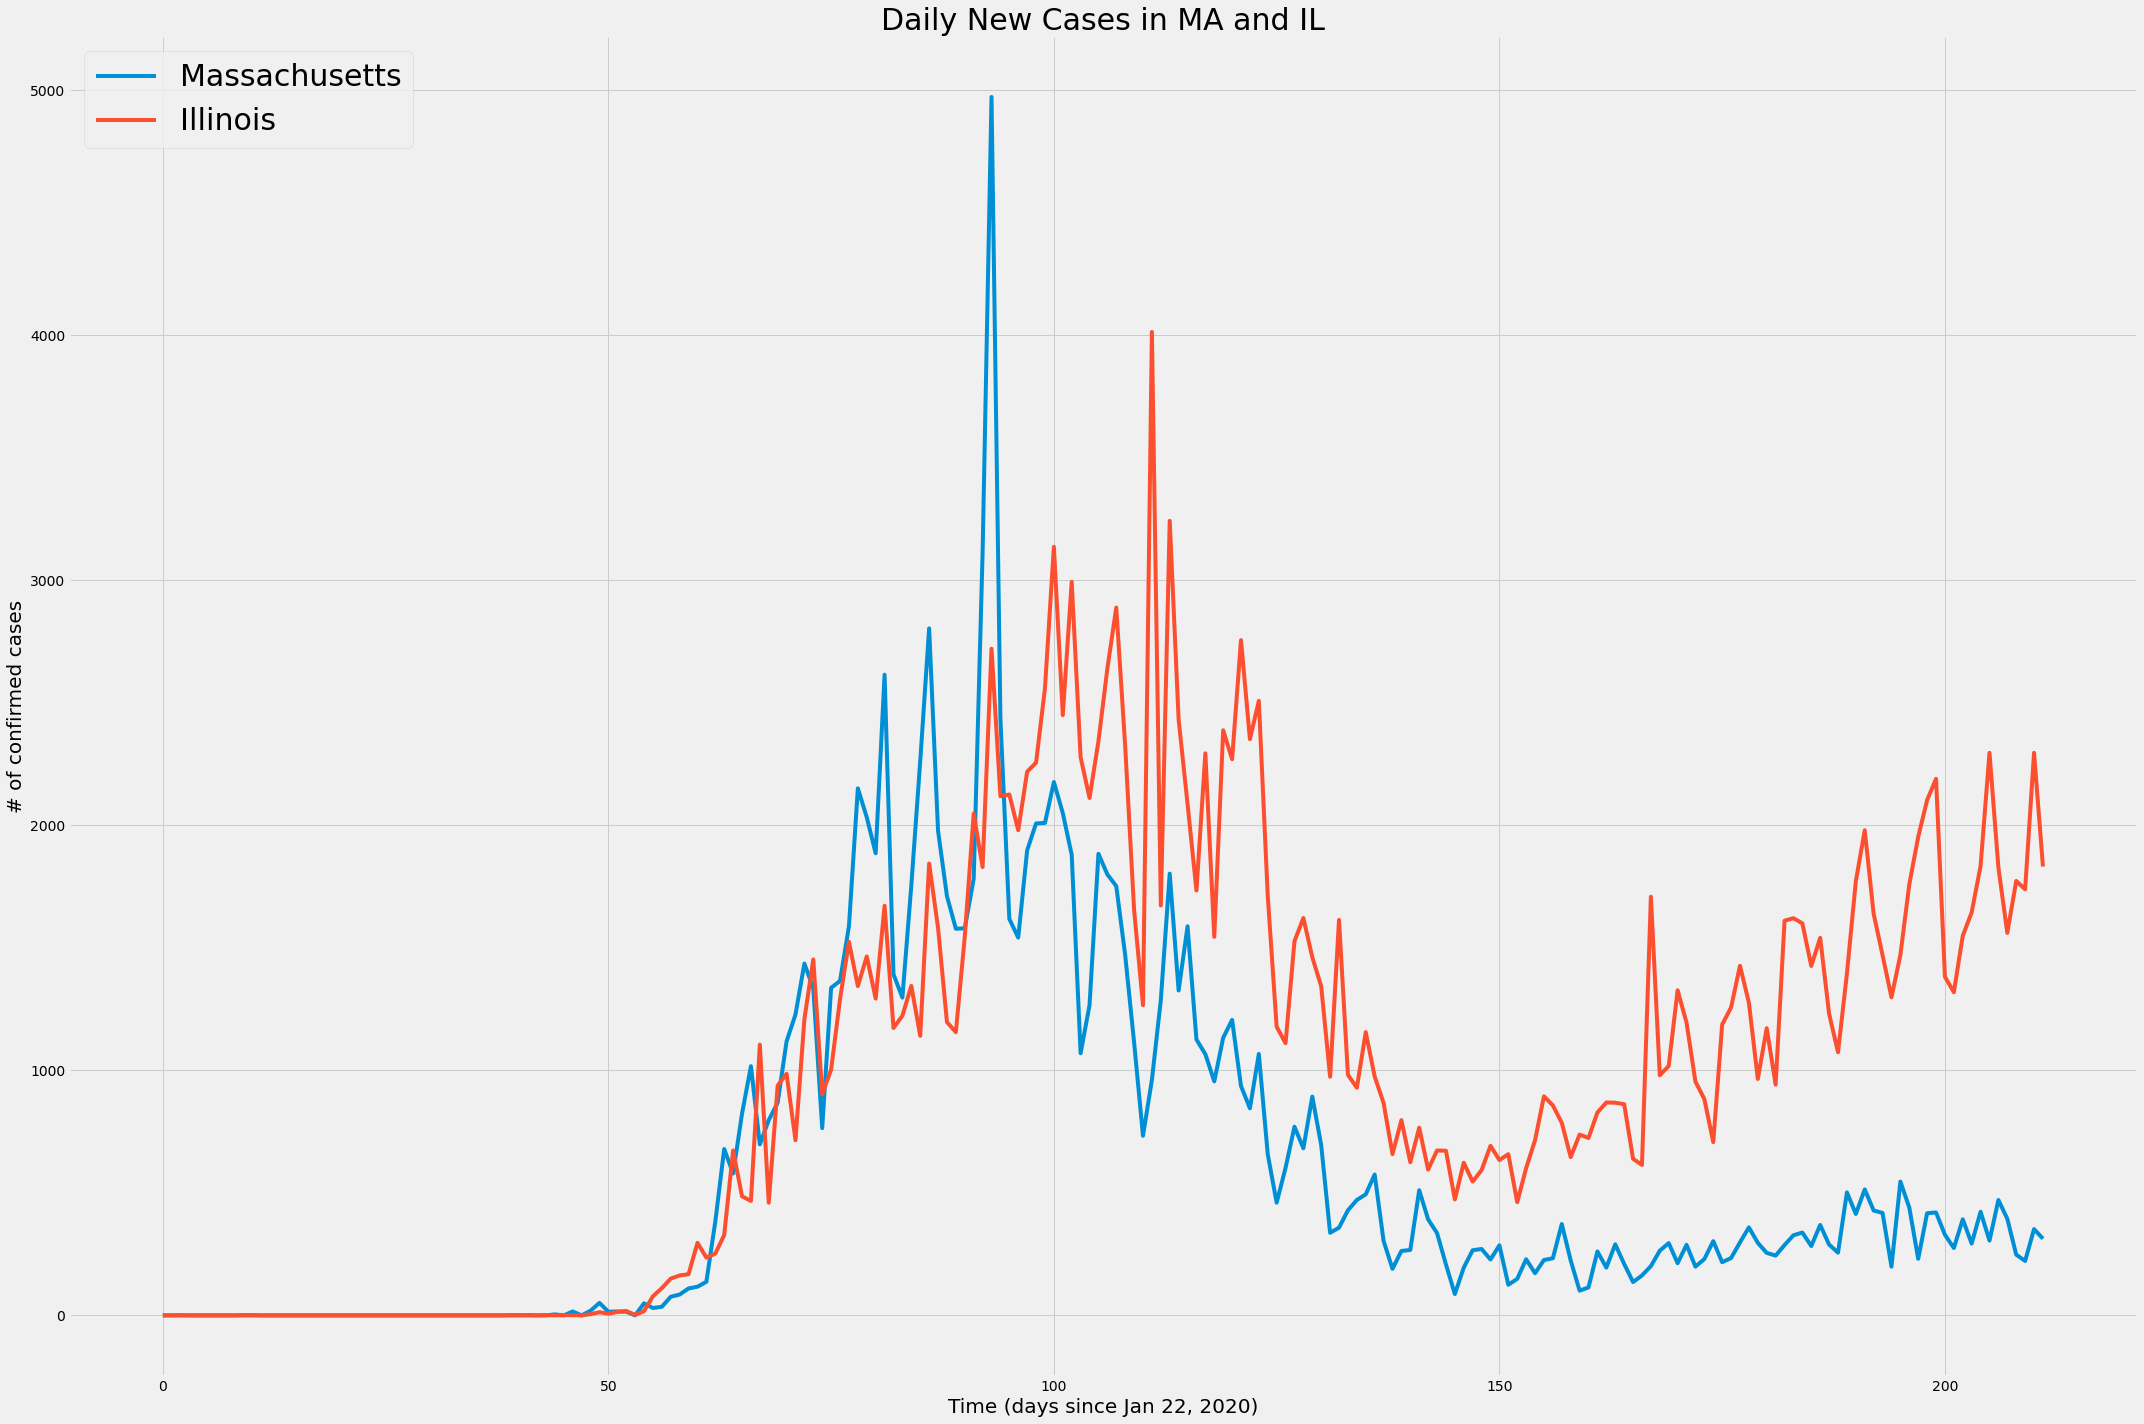

In [60]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
cm = plt.get_cmap('jet')
NUM_COLORS = 0
LINE_STYLES = ['solid', 'dashed', 'dotted']
NUM_STYLES = len(LINE_STYLES)


#for val in np.unique(confirmed["Province_State"]):
#    df = data.filter_by_attribute(
#        confirmed, "Province_State", val)
#    cases, labels = data.get_cases_chronologically(df)
#    cases = cases.sum(axis=0)

#    if cases.sum() > MIN_CASES:
#        NUM_COLORS += 1
        
#colors = [cm(i) for i in np.linspace(0, 1, NUM_COLORS)]
#legend = []
#handles = []

mass_df = data.filter_by_attribute(
    confirmed, "Province_State", "Massachusetts")
mass_cases, labels = data.get_cases_chronologically(mass_df)
mass_cases = mass_cases.sum(axis=0)
new_mass_cases = np.insert(mass_cases, 0, 0)
daily_mass_cases = []
for i in range(len(mass_cases)):
    daily_mass_cases.append(new_mass_cases[i + 1] - new_mass_cases[i])

il_df = data.filter_by_attribute(
    confirmed, "Province_State", "Illinois")
il_cases, labels = data.get_cases_chronologically(il_df)
il_cases = il_cases.sum(axis=0)
new_il_cases = np.insert(il_cases, 0, 0)
daily_il_cases = []
for j in range(len(il_cases)):
    daily_il_cases.append(new_il_cases[j + 1] - new_il_cases[j])
    
ax.plot(daily_mass_cases, label='Massachusetts')
ax.plot(daily_il_cases, label='Illinois')
ax.legend(['Massachusetts', 'Illinois'], loc=2, fontsize=30)

#    if cases.sum() > MIN_CASES:
#        i = len(legend)
#        lines = ax.plot(cases, label=labels[0,1])
#        handles.append(lines[0])
#        lines[0].set_linestyle(LINE_STYLES[i%NUM_STYLES])
#        lines[0].set_color(colors[i])
#        legend.append(labels[0, 6])
        
ax.set_ylabel('# of confirmed cases', fontsize=20)
ax.set_xlabel("Time (days since Jan 22, 2020)", fontsize=20)
ax.set_title('Daily New Cases in MA and IL', fontsize=30)

ax.set_yscale('linear')
#ax.legend(handles, legend, bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=9)
plt.tight_layout()

## Polynomial Regression (from hw 3)

### For MA

In [88]:
from polynomial_regression import PolynomialRegression
from metrics import mean_squared_error

In [89]:
degrees = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
training_err = np.ones(10)
testing_err = np.ones(10)
x = np.linspace(1, 212, num=212)
for degree in range(10):
    p = PolynomialRegression(degree)
    p.fit(x, daily_mass_cases)
    training_err[degree] = mean_squared_error(p.predict(x), daily_mass_cases)
print(training_err)
print(training_err.argmin())

[541939.78088288 540382.44497266 359296.47246959 336318.56613697
 221581.5351882  182819.74747301 136993.10805866 109596.75114435
 104077.39154787  88146.69062263]
9


[ 3.67823011e+02 -1.75260434e+02  2.11911689e+01 -1.05428079e+00
  2.61445063e-02 -3.55716945e-04  2.79243840e-06 -1.26427779e-08
  3.07103868e-11 -3.10296708e-14]


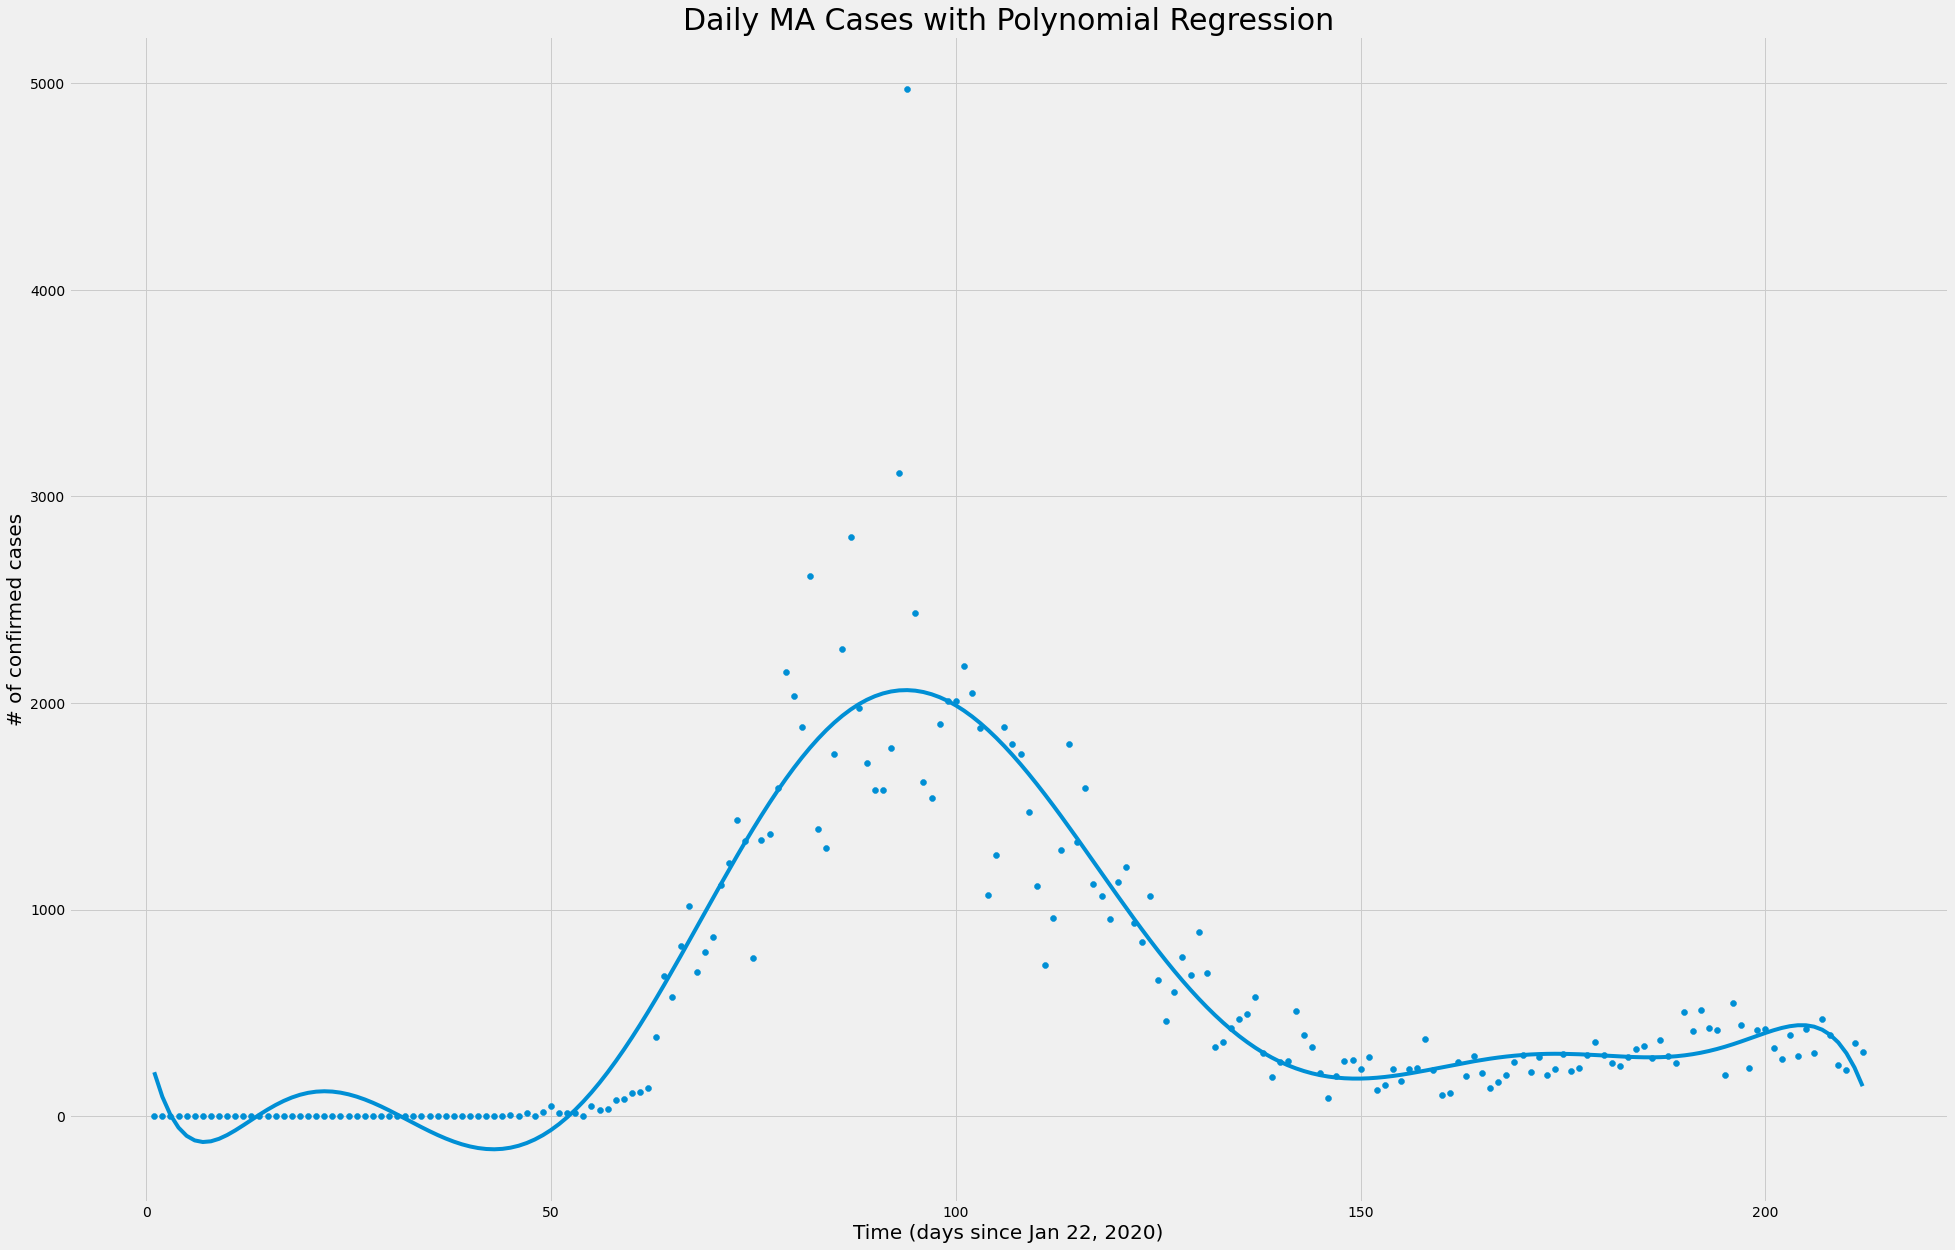

In [90]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
cm = plt.get_cmap('jet')
NUM_COLORS = 0
LINE_STYLES = ['solid', 'dashed', 'dotted']
NUM_STYLES = len(LINE_STYLES)

ptrain = PolynomialRegression(9)
ptrain.fit(x, daily_mass_cases)
print(ptrain.coefficients)

ytrain = ptrain.predict(x)
ax.set_title("Daily MA Cases with Polynomial Regression", fontsize=30)
ax.set_ylabel('# of confirmed cases', fontsize=20)
ax.set_xlabel("Time (days since Jan 22, 2020)", fontsize=20)

ax.scatter(x, daily_mass_cases)
ax.plot(x, ytrain)

In [94]:
degrees = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
training_err = np.ones(10)
testing_err = np.ones(10)
x = np.linspace(1, 168, num=168)
daily_mass_cases2 = daily_mass_cases[44:]
for degree in range(10):
    p = PolynomialRegression(degree)
    p.fit(x, daily_mass_cases2)
    training_err[degree] = mean_squared_error(p.predict(x), daily_mass_cases2)
print(training_err)
print(training_err.argmin())

[569494.01686508 494456.94280909 428750.71257037 198845.99616901
 178307.60874066 136135.88842512 106025.35135038 104566.55483256
 102657.19747257 100206.677035  ]
9


[-1.17689487e+01  3.15483613e+01 -9.02372386e+00  8.38974683e-01
 -2.84852923e-02  4.87635150e-04 -4.71847965e-06  2.62898242e-08
 -7.88803264e-11  9.88995819e-14]


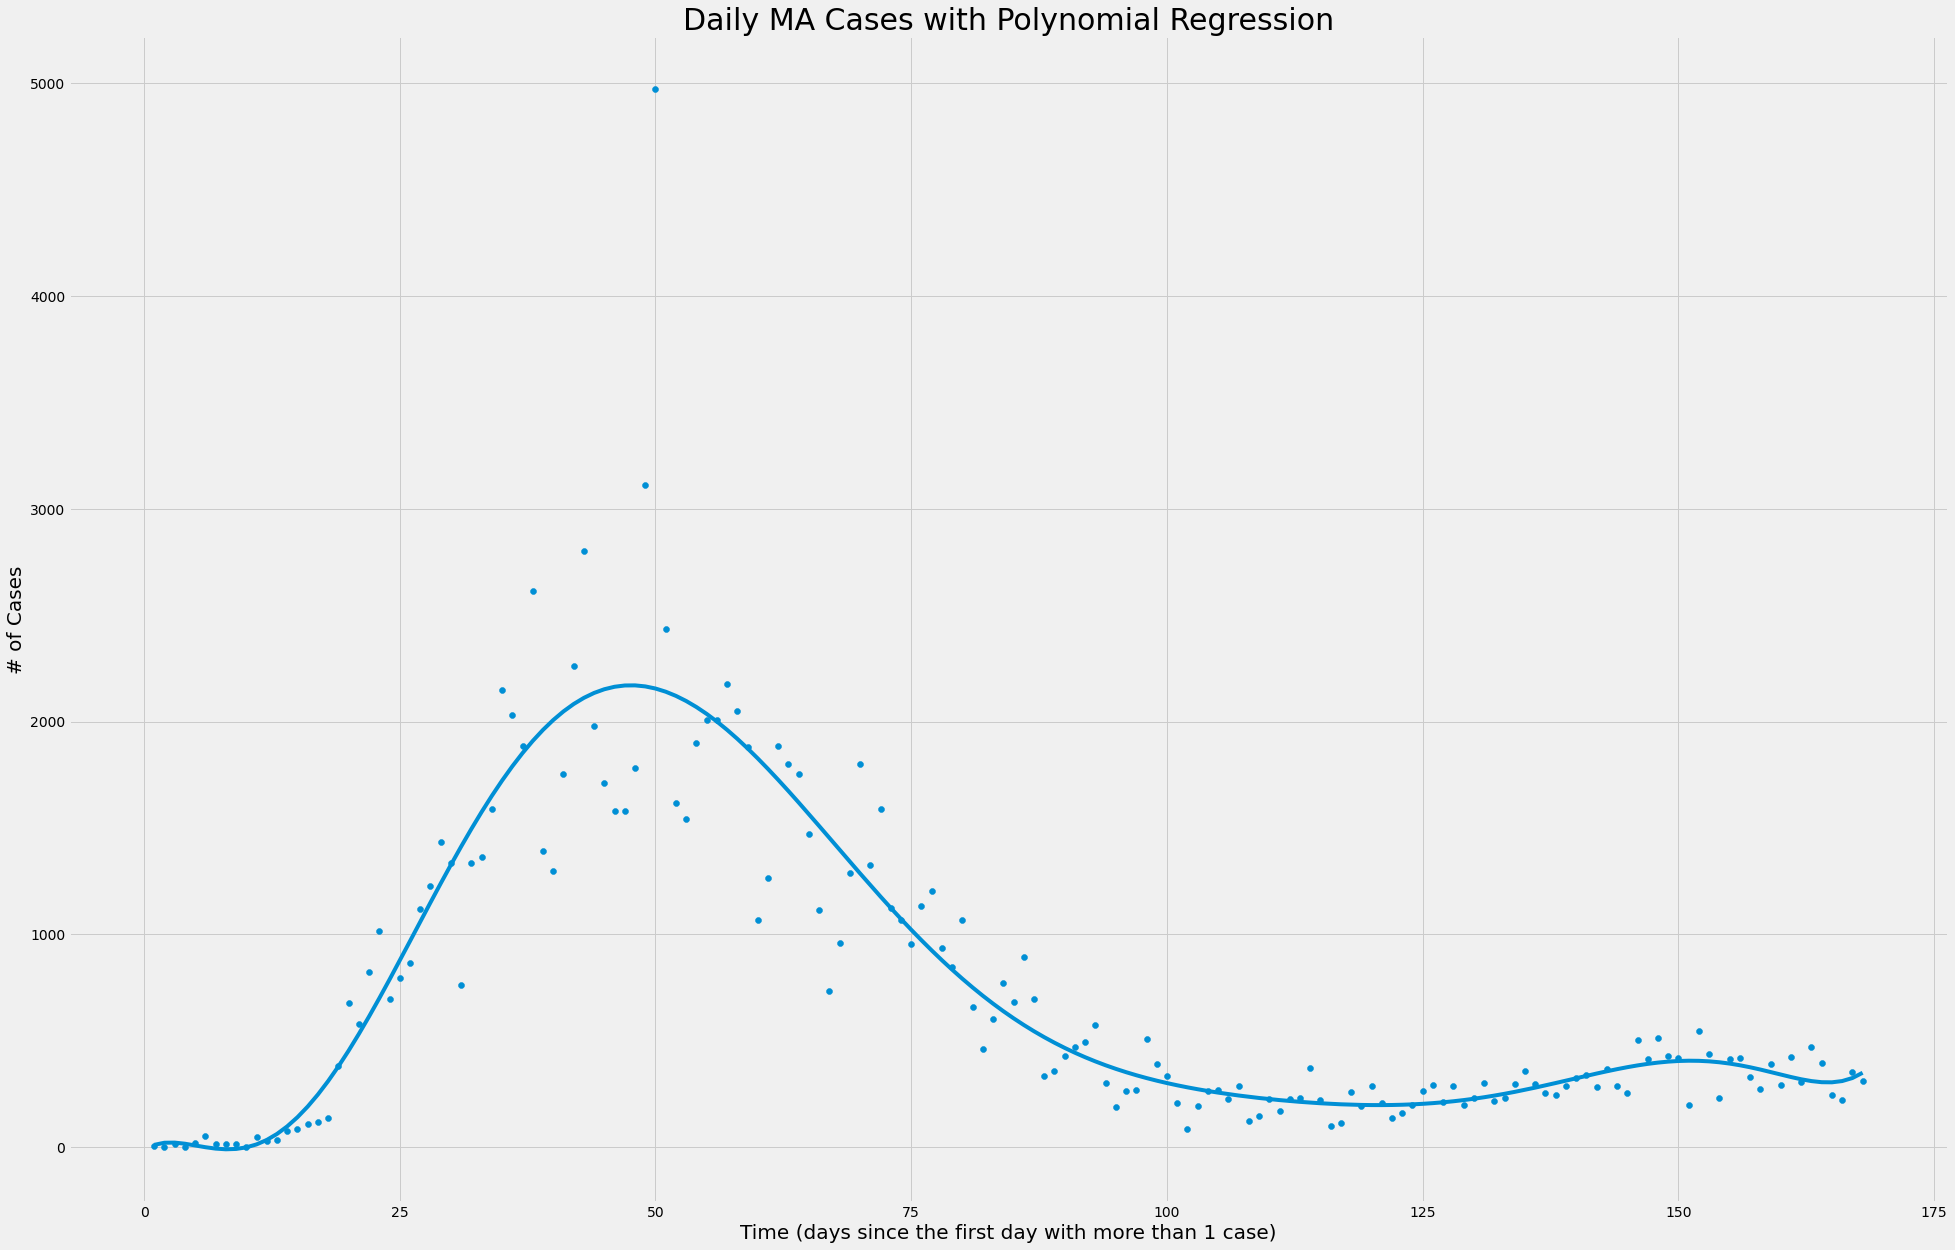

In [95]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
cm = plt.get_cmap('jet')
NUM_COLORS = 0
LINE_STYLES = ['solid', 'dashed', 'dotted']
NUM_STYLES = len(LINE_STYLES)

ptrain = PolynomialRegression(9)
ptrain.fit(x, daily_mass_cases2)
print(ptrain.coefficients)

ytrain = ptrain.predict(x)
ax.set_title("Daily MA Cases with Polynomial Regression", fontsize=30)
ax.set_xlabel("Time (days since the first day with more than 1 case)", fontsize=20)
ax.set_ylabel("# of Cases", fontsize=20)


ax.scatter(x, daily_mass_cases2)
ax.plot(x, ytrain)

### For IL

In [91]:
degrees = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
training_err = np.ones(10)
testing_err = np.ones(10)
x = np.linspace(1, 212, num=212)
for degree in range(10):
    p = PolynomialRegression(degree)
    p.fit(x, daily_il_cases)
    training_err[degree] = mean_squared_error(p.predict(x), daily_il_cases)
print(training_err)
print(training_err.argmin())

[735380.86187255 496852.79418237 410837.66819528 398640.93197516
 222826.94349654 215732.00822465 120397.75075115 119359.71781053
  90962.96028461  90880.930196  ]
9


[ 2.20142418e+02 -9.05004390e+01  9.40356860e+00 -3.97425912e-01
  8.06652949e-03 -8.32872458e-05  4.37210837e-07 -9.93350631e-10
  6.33479949e-14  2.22554783e-15]


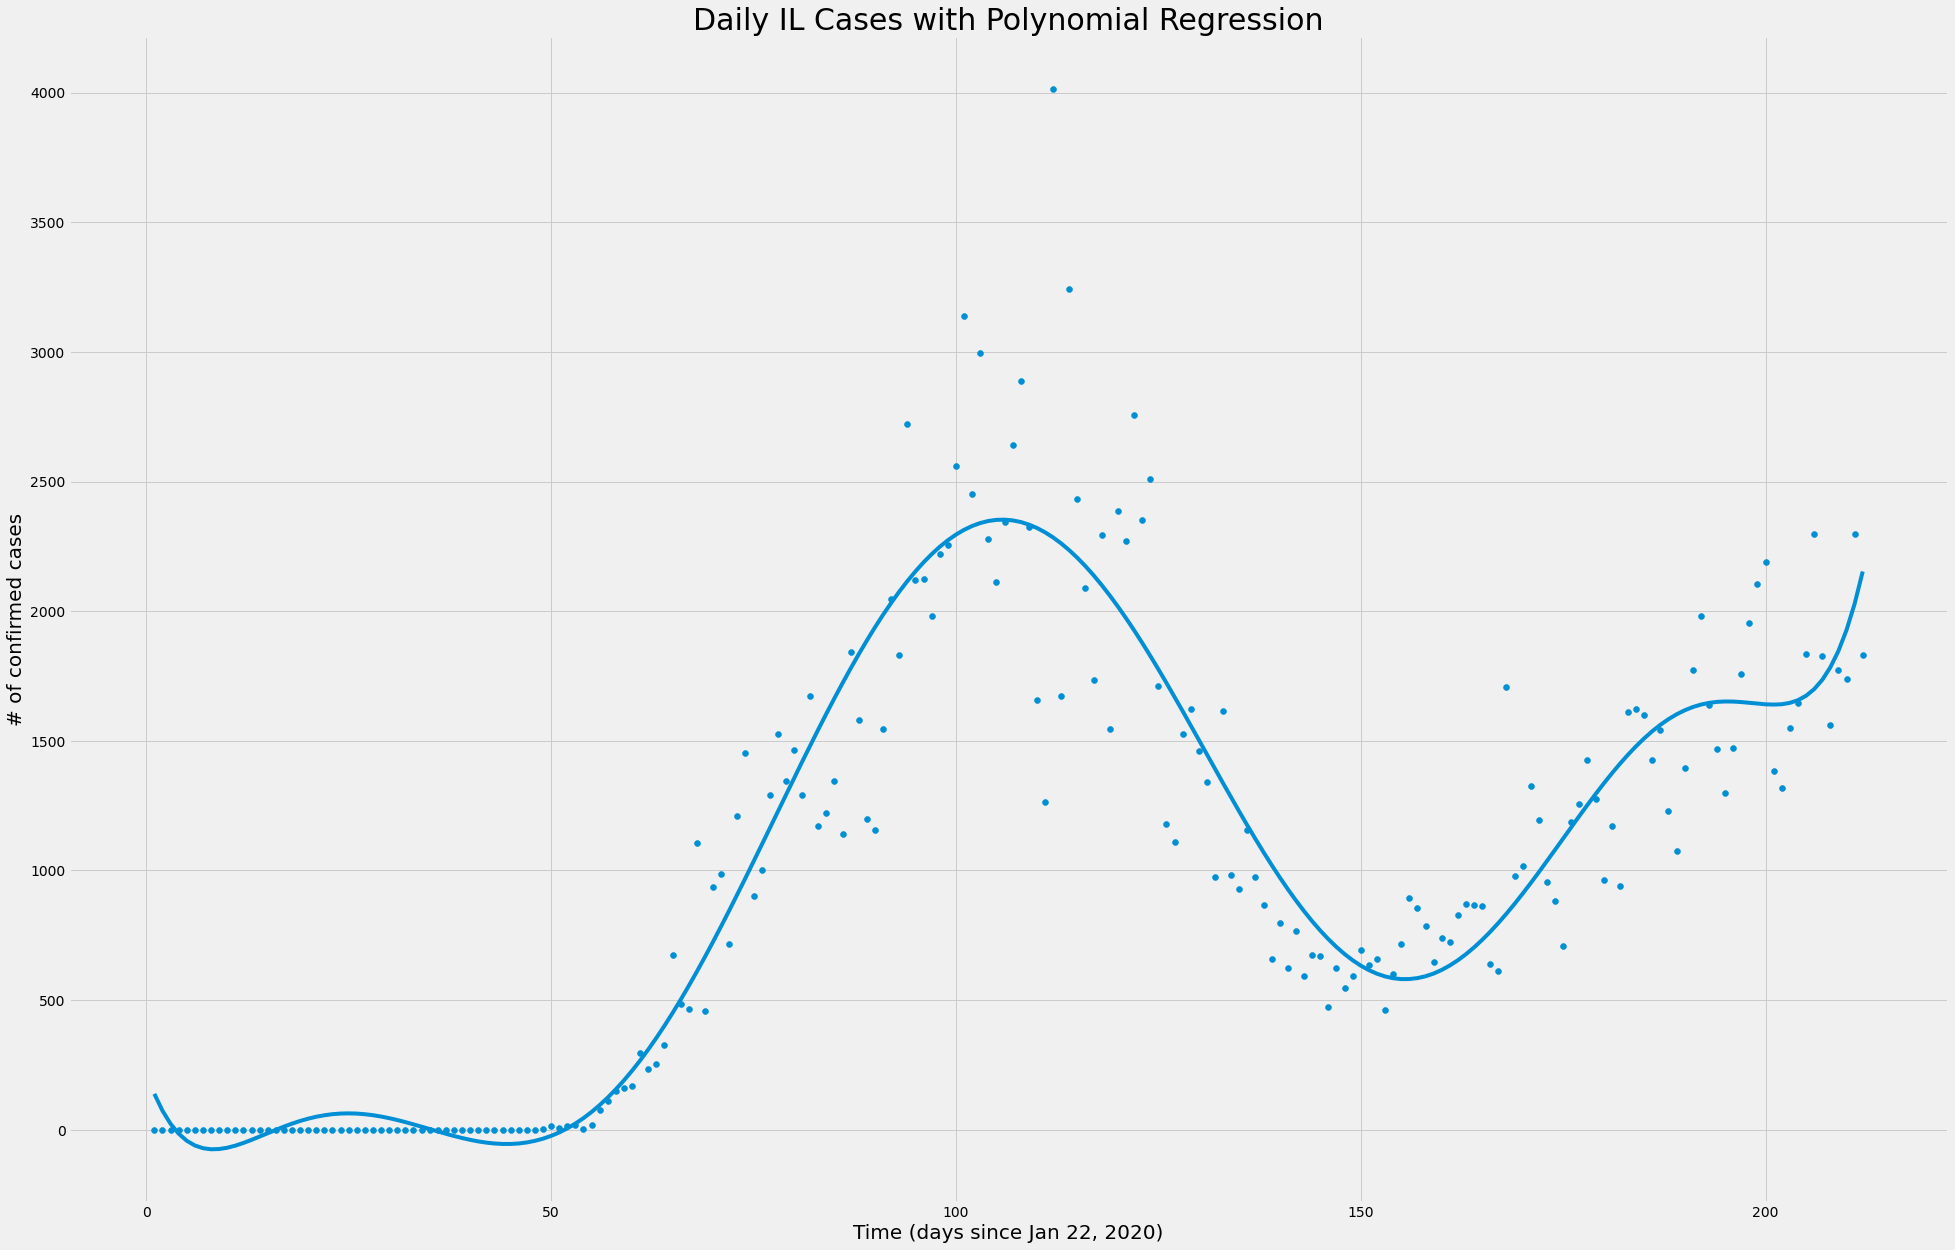

In [93]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
cm = plt.get_cmap('jet')
NUM_COLORS = 0
LINE_STYLES = ['solid', 'dashed', 'dotted']
NUM_STYLES = len(LINE_STYLES)

ptrain = PolynomialRegression(9)
ptrain.fit(x, daily_il_cases)
print(ptrain.coefficients)
ytrain = ptrain.predict(x)
ax.set_title("Daily IL Cases with Polynomial Regression", fontsize=30)
ax.set_ylabel('# of confirmed cases', fontsize=20)
ax.set_xlabel("Time (days since Jan 22, 2020)", fontsize=20)

ax.scatter(x, daily_il_cases)
ax.plot(x, ytrain)

In [96]:
degrees = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
training_err = np.ones(10)
testing_err = np.ones(10)
x = np.linspace(1, 164, num=164)
daily_il_cases2 = daily_il_cases[48:]
for degree in range(10):
    p = PolynomialRegression(degree)
    p.fit(x, daily_il_cases2)
    training_err[degree] = mean_squared_error(p.predict(x), daily_il_cases2)
print(training_err)
print(training_err.argmin())

[561408.02896341 538470.25161758 499173.1756745  223493.03367996
 223077.92191904 135166.86565895 132510.43657143 114269.86325074
 113885.45987885 106471.79366866]
9


[ 1.51488771e+02 -1.11316984e+02  1.97498096e+01 -1.17603514e+00
  3.81764457e-02 -7.08980243e-04  7.65432682e-06 -4.74556305e-08
  1.56725263e-10 -2.13765544e-13]


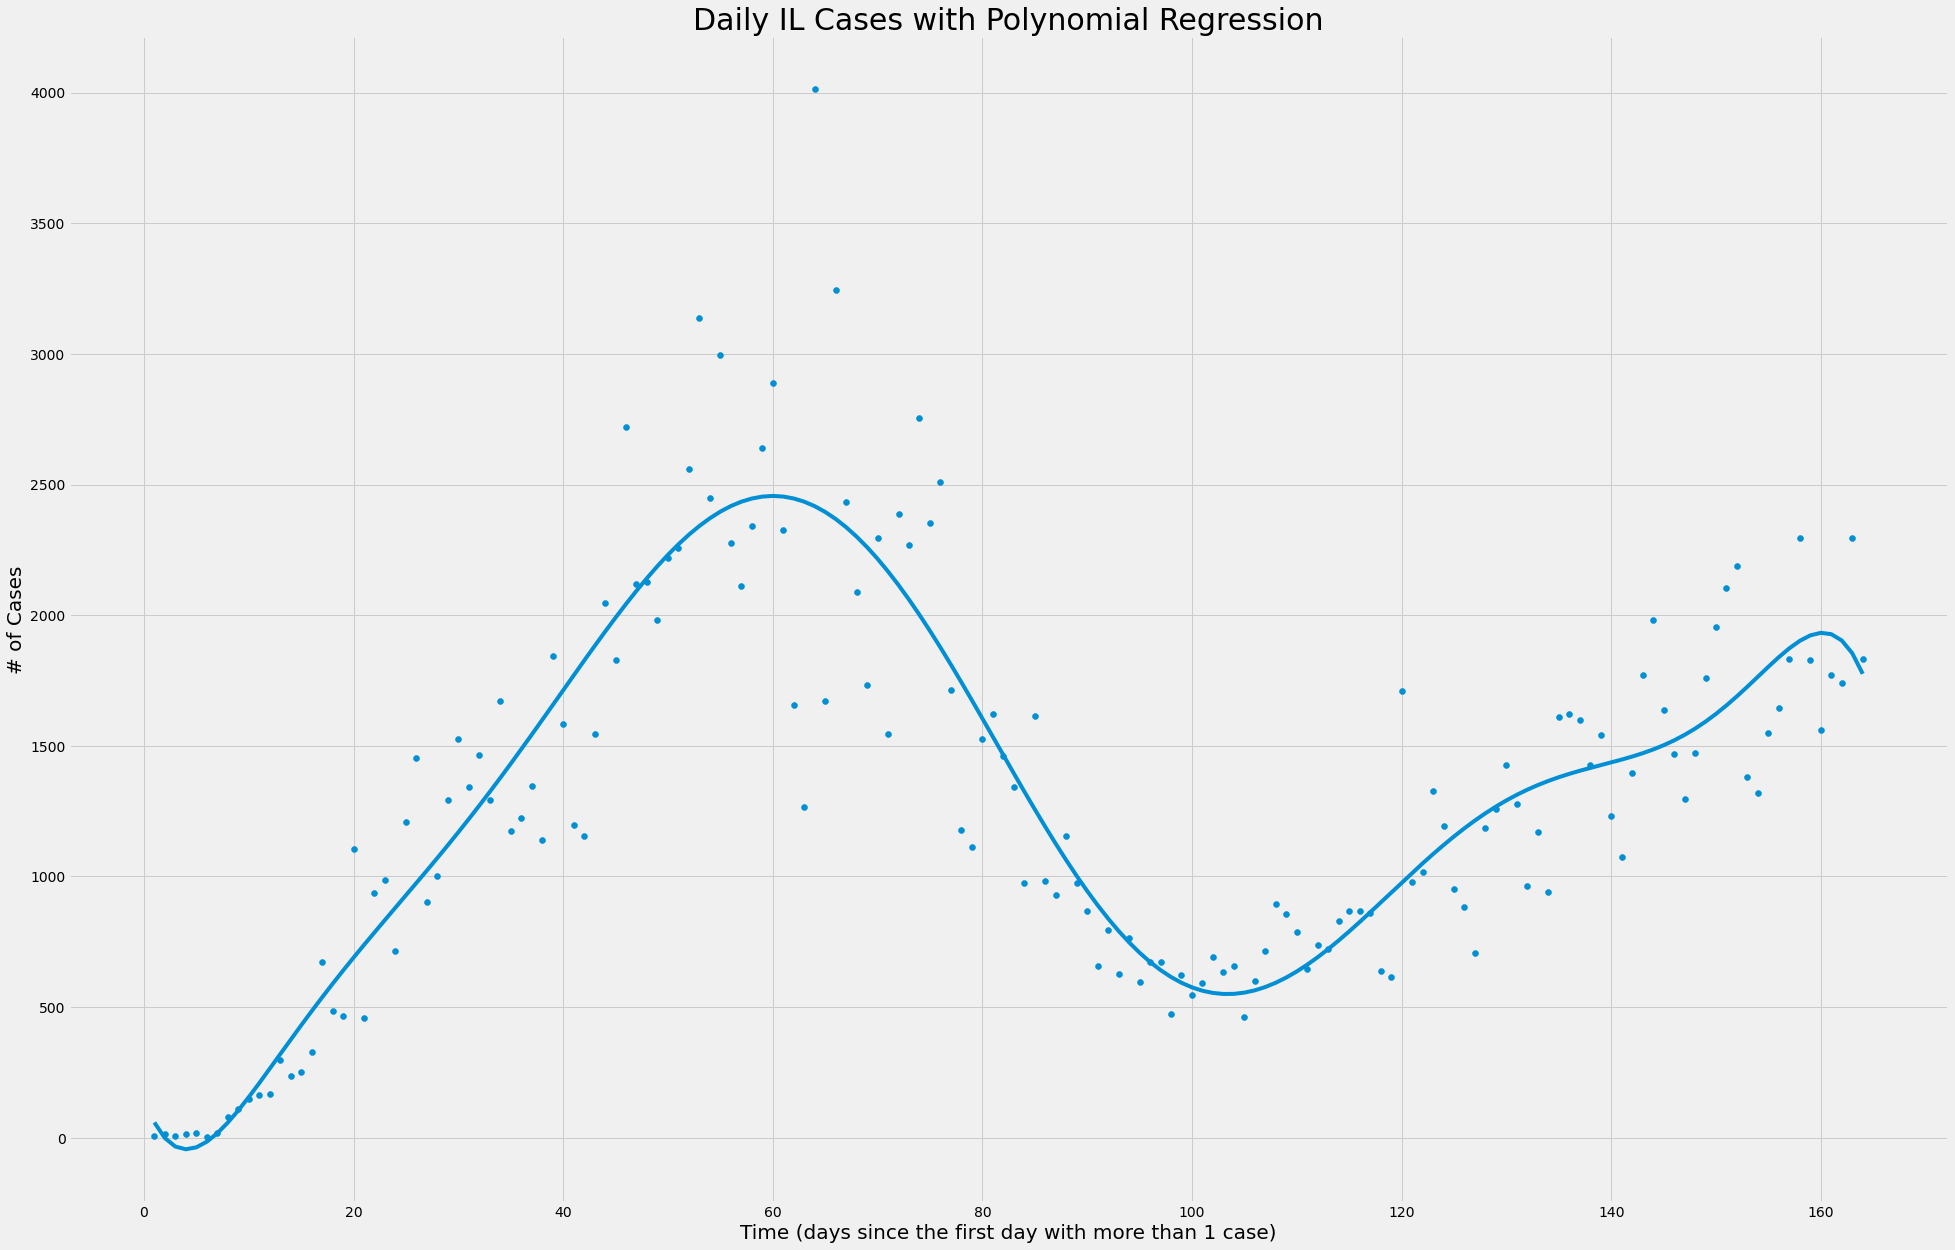

In [97]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
cm = plt.get_cmap('jet')
NUM_COLORS = 0
LINE_STYLES = ['solid', 'dashed', 'dotted']
NUM_STYLES = len(LINE_STYLES)

ptrain = PolynomialRegression(9)
ptrain.fit(x, daily_il_cases2)
print(ptrain.coefficients)
ytrain = ptrain.predict(x)
ax.set_title("Daily IL Cases with Polynomial Regression", fontsize=30)
ax.set_xlabel("Time (days since the first day with more than 1 case)", fontsize=20)
ax.set_ylabel("# of Cases", fontsize=20)

ax.scatter(x, daily_il_cases2)
ax.plot(x, ytrain)